# Violin plot + boxplot + sample size in ggplot2

#### ช่วยบอกการกระจายของข้อมูล และ ช่วยสรุปสถิติ


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see http://bit.ly/arialnarrow

Loading required package: viridisLite

Joining, by = "name"
Warning message:
"position_dodge requires non-overlapping x intervals"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, a

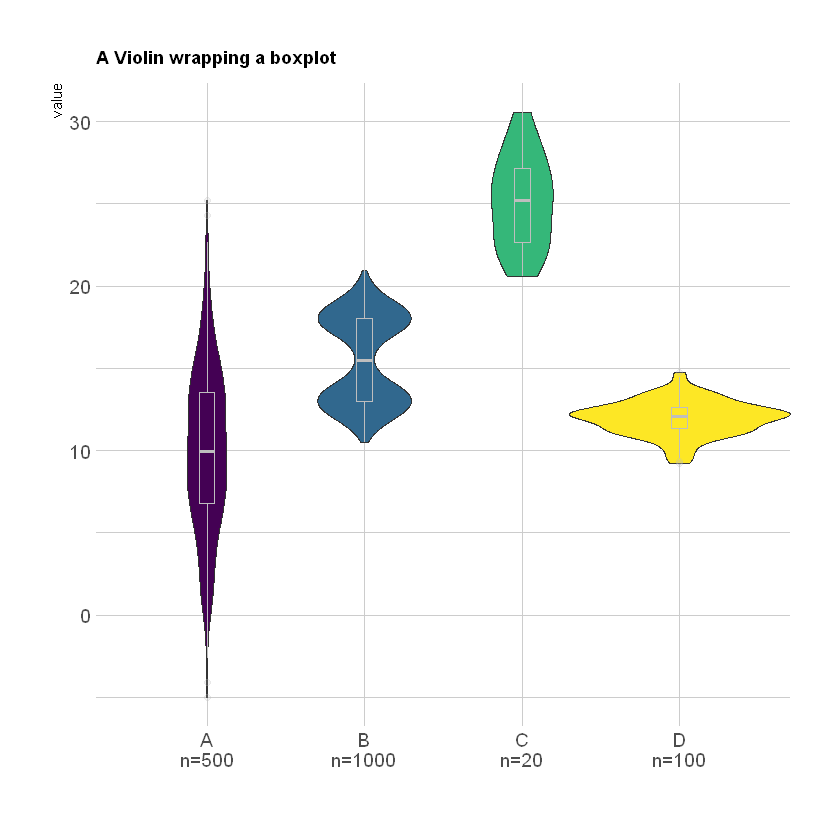

In [1]:
# Libraries
library(ggplot2)
library(dplyr)
library(hrbrthemes)
library(viridis)

# create a dataset
data <- data.frame(
  name=c( rep("A",500), rep("B",500), rep("B",500), rep("C",20), rep('D', 100)  ),
  value=c( rnorm(500, 10, 5), rnorm(500, 13, 1), rnorm(500, 18, 1), rnorm(20, 25, 4), rnorm(100, 12, 1) )
)

# sample size
sample_size = data %>% group_by(name) %>% summarize(num=n())

# Plot
data %>%
  left_join(sample_size) %>%
  mutate(myaxis = paste0(name, "\n", "n=", num)) %>%
  ggplot( aes(x=myaxis, y=value, fill=name)) +
    geom_violin(width=1.4) +
    geom_boxplot(width=0.1, color="grey", alpha=0.2) +
    scale_fill_viridis(discrete = TRUE) +
    theme_ipsum() +
    theme(
      legend.position="none",
      plot.title = element_text(size=11)
    ) +
    ggtitle("A Violin wrapping a boxplot") +
    xlab("")